In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os

%matplotlib inline

In [5]:
def parse_erdos_latency(filename):
    filename = "/home/peter/Downloads/results_latency_pull_op.out"
    with open(filename) as f:
        log = f.read()
    msg_size_lines = re.findall("Received [0-9]+ messages of size [0-9]+", log)
    msg_sizes = [int(re.findall("(?<=size )[0-9]+", s)[0]) for s in msg_size_lines]
    latencies = list(map(float, re.findall("(?<=median: )[0-9\.]+(?= ms)", log)))
    
    return msg_sizes[:len(latencies)], latencies

In [6]:
np.genfromtxt?

In [40]:
def parse_unit(unit):
    if unit == "KB":
        return 2**10
    if unit == "MB":
        return 2**20

    
def parse_ros_latency():
    ros_dir = "/home/peter/workspace/erdos-private/experiments/caelum-experiments/ros/latency_results/"
    msg_sizes = []
    median_latencies = []
    for folder in os.listdir(ros_dir):
        units = folder[-2:]
        msg_size = int(folder[:-2]) * parse_unit(units)
        data_dir = ros_dir + folder + "/2/30/"
        data_file = [data_dir + f for f in os.listdir(data_dir) if "subscriber_1" in f][0]

        # with open(data_file) as f:
        # text = "\n".join(f.readlines()[:-2])
        data = np.genfromtxt(data_file, delimiter=", ", skip_footer=2).T / 1e3
        latencies = data[1] - data[0]
        median_latency = np.mean(latencies)
        msg_sizes.append(msg_size)
        median_latencies.append(median_latency)

    sorted_data = sorted(zip(msg_sizes, median_latencies))
    msg_sizes = [d[0] for d in sorted_data]
    median_latencies = [d[1] for d in sorted_data]
    
    return msg_sizes, median_latencies

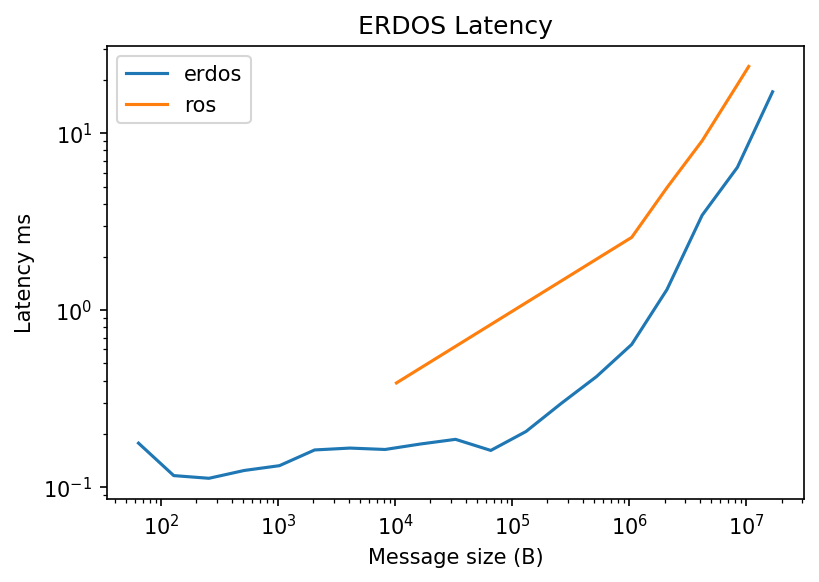

In [41]:
erdos_x, erdos_y = parse_erdos_latency("/home/peter/Downloads/results_latency_pull_op.out")
ros_x, ros_y = parse_ros_latency()

plt.rcParams['figure.dpi'] = 150

plt.title("ERDOS Latency")
plt.xlabel("Message size (B)")
plt.ylabel("Latency ms")

plt.loglog(erdos_x, erdos_y, label="erdos")
plt.loglog(ros_x, ros_y, label="ros")
plt.legend()

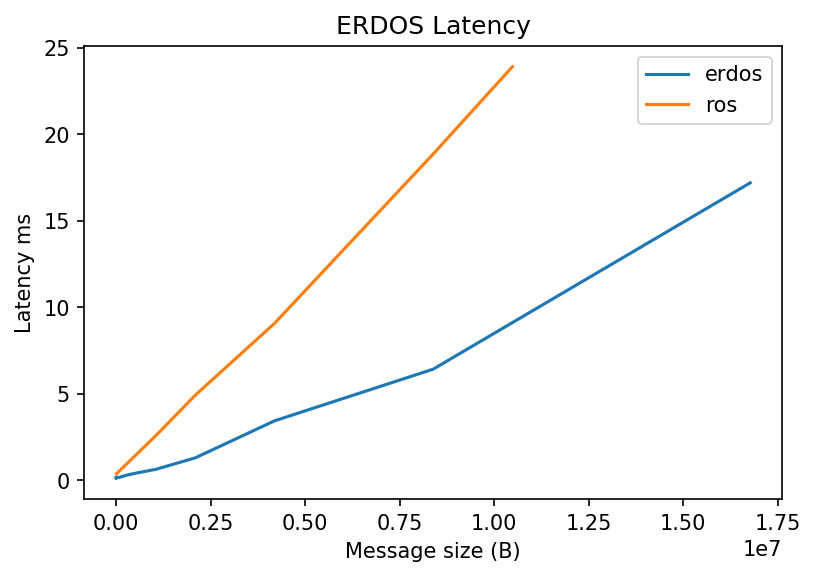

In [42]:
erdos_x, erdos_y = parse_erdos_latency("/home/peter/Downloads/results_latency_pull_op.out")
ros_x, ros_y = parse_ros_latency()

plt.rcParams['figure.dpi'] = 150

plt.title("ERDOS Latency")
plt.xlabel("Message size (B)")
plt.ylabel("Latency ms")

plt.plot(erdos_x, erdos_y, label="erdos")
plt.plot(ros_x, ros_y, label="ros")
plt.legend()